## **Pertanyaan:**
### 1. Berapa persentase orang yang menderita penyakit jantung?
### 2. Umur berapa yang paling rawan menderita penyakit jantung?
### 3. Apakah jenis kelamin berpengaruh pada peluang menderita penyakit jantung?
### 4. Jenis chestpain apa yang rawan memicu penyakit jantung?
### 5. Bagaimana relasi resting blood pressure dengan peluang menderita penyakit jantung?
### 6. Berapa mm/dl kolestrol yang rawan memicu penyakit jantung?
### 7. Berapa range fasting blood sugar yang aman dari penyakit jantung?
### 8. Berapa batas maximum heart rate yang rawan penyakit jantung?
### 9. Apakah exercise induced angina berpengaruh pada peluang menderita penyakit jantung?
### 10. Bagaimana pengaruh ST Depression terhadap penyakit jantung?
### 11. Apakah ST Slope juga berpengaruh terhadap penyakit jantung?

In [1]:
# Import Package yang dibutuhkan
import numpy as np 
import pandas as pd 
import datetime
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('data.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
# Ukuran dataset
df.shape

(918, 12)

In [4]:
# Menampilkan nama-nama kolom pada dataset ini
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [5]:
# Menampilkan jenis tipe data pada setiap kolom
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [6]:
df.corr()['HeartDisease']

C:\Users\Nando\AppData\Local\Temp\ipykernel_16736\561954474.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['HeartDisease']


Age             0.282039
RestingBP       0.107589
Cholesterol    -0.232741
FastingBS       0.267291
MaxHR          -0.400421
Oldpeak         0.403951
HeartDisease    1.000000
Name: HeartDisease, dtype: float64

In [7]:
df['HeartDisease'] = df['HeartDisease'].replace({0:'No', 1:'Yes'})

## **1. Berapa persentase orang yang menderita penyakit jantung?**

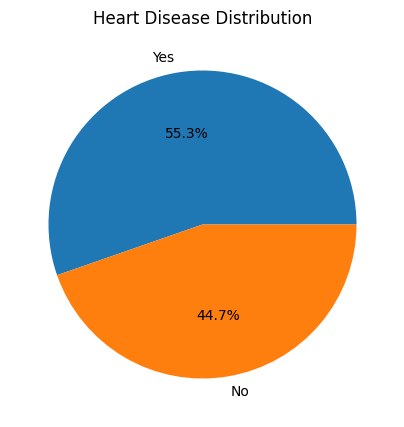

In [72]:
heart_disease_counts = df['HeartDisease'].value_counts()

plt.figure(figsize = (5,5))

plt.pie(heart_disease_counts, labels=heart_disease_counts.index, autopct='%1.1f%%')

plt.title('Heart Disease Distribution')

plt.show()

Tampak bahwa distribusi keduanya seimbang (balance)

## **2. Umur berapa yang paling rawan menderita penyakit jantung?**

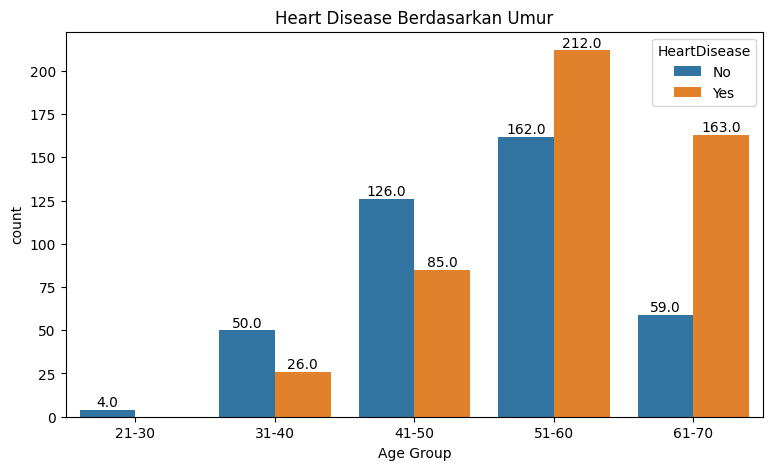

In [73]:
# Lakukan binning untuk age
bins = [20, 30, 40, 50, 60, 70]
labels = ['21-30', '31-40', '41-50', '51-60', '61-70']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(9, 5))
ax = sns.countplot(data=df, x='Age Group', hue='HeartDisease')

# Memberi anotasi
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Heart Disease Berdasarkan Umur')
plt.show()

Tampak bahwa rentang umur 51 tahun ke atas cukup rawan terkena penyakit jantung. Semakin bertambahnya umur, maka peluang terkena penyakit jantung semakin besar.

## **3. Berapa batas maximum heart rate yang rawan penyakit jantung?**

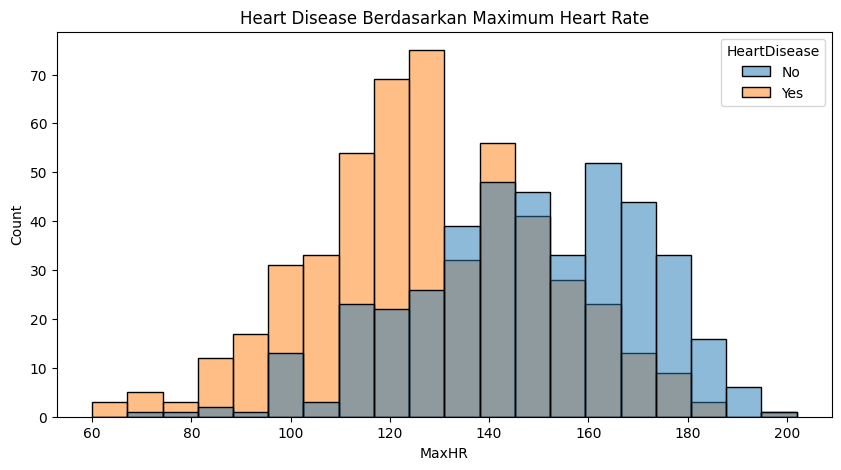

In [74]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df, x='MaxHR', hue='HeartDisease')

plt.title('Heart Disease Berdasarkan Maximum Heart Rate')
plt.show()

Terlihat jelas bahwa sebagian besar orang yang menderita penyakit jantung memiliki maximum heart rate di bawah 130. Dari grafik tersebut tampak bahwa peluang menderita penyakit jantung semakin besar jika maximum heart ratenya semakin rendah.

## **4. Apakah jenis kelamin berpengaruh pada peluang menderita penyakit jantung?**

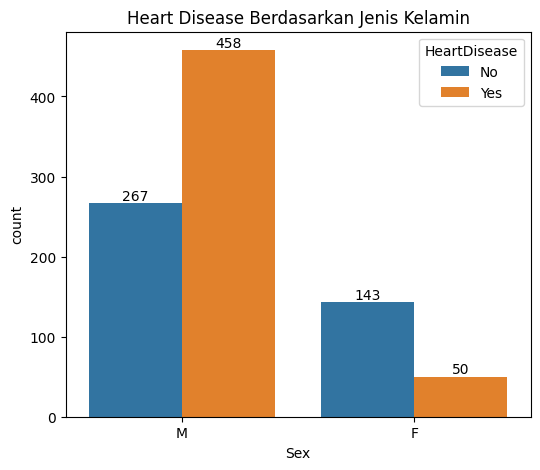

In [75]:
plt.figure(figsize=(6, 5))
ax = sns.countplot(data=df, x='Sex', hue='HeartDisease')

#  Memberi anotasi
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Heart Disease Berdasarkan Jenis Kelamin')
plt.show()

Ya, tampak ada perbedaan yang sangat signifikan mengenai penderita penyakit jantung berdasarkan jenis kelamin.
<br>Laki-laki lebih rawan menderita penyakit jantung dibandingkan perempuan.

## **5. Jenis chestpain apa yang rawan memicu penyakit jantung?**

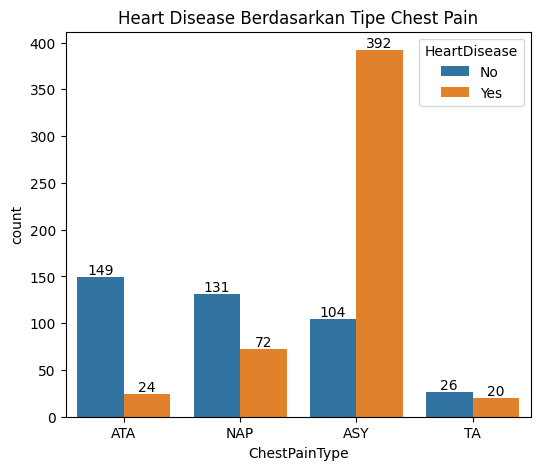

In [76]:
plt.figure(figsize=(6, 5))
ax = sns.countplot(data=df, x='ChestPainType', hue='HeartDisease')

#  Memberi anotasi
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Heart Disease Berdasarkan Tipe Chest Pain')
plt.show()

Chestpain asymptomatic adalah jenis chestpain yang paling rawan memicu penyakit jantung.
<br>Hal tersebut tampak pada grafik di atas dengan perbedaan yang sangat signifikan dibanding ketiga jenis chestpain yang lain.

## **6. Apakah besar tekanan darah dapat mengindikasikan penyakit jantung?**

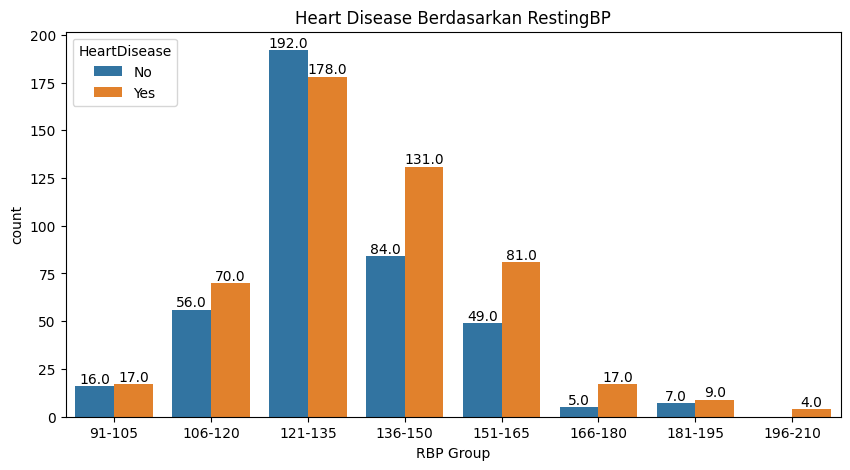

In [77]:
# Lakukan binning untuk RestingBP
bins = [90, 105, 120, 135, 150, 165, 180, 195, 210]
labels = ['91-105', '106-120', '121-135', '136-150', '151-165', '166-180', '181-195', '196-210']
df['RBP Group'] = pd.cut(df['RestingBP'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='RBP Group', hue='HeartDisease')

# Memberi anotasi
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Heart Disease Berdasarkan RestingBP')
plt.show()

Tidak terlalu tampak perbedaan yang signifikan pada grafik di atas.
<br>Namun, tampak bahwa sebagian besar orang yang tidak menderita penyakit jantung memiliki tekanan darah antara 120-130 mm Hg.

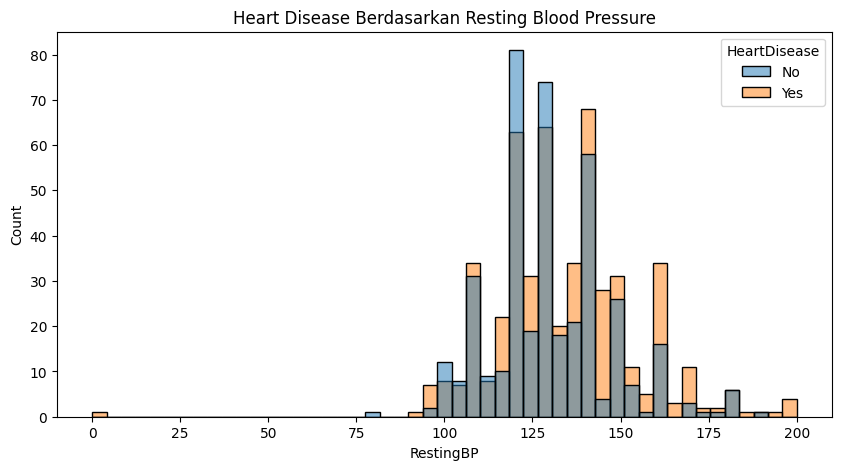

In [78]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df, x='RestingBP', hue='HeartDisease')

plt.title('Heart Disease Berdasarkan Resting Blood Pressure')
plt.show()

In [79]:
df['RestingBP'].replace(0, df['RestingBP'].median(),inplace=True)

#### Setelah handling outliers

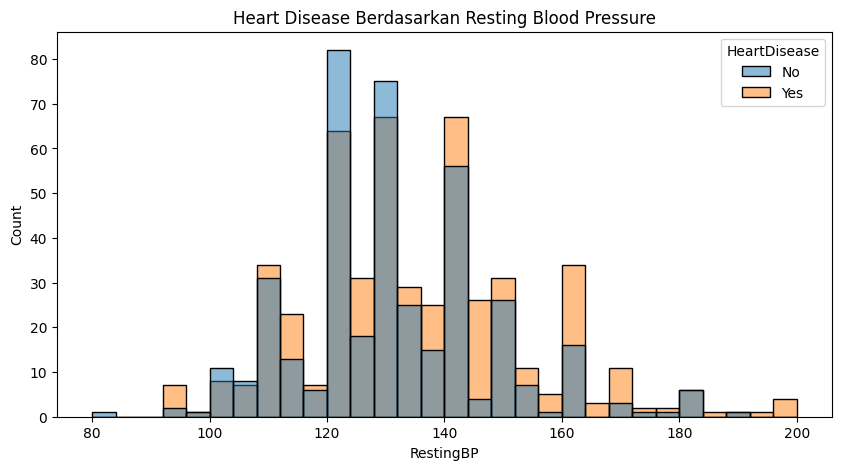

In [80]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df, x='RestingBP', hue='HeartDisease')

plt.title('Heart Disease Berdasarkan Resting Blood Pressure')
plt.show()

## **7. Berapa tingkat kolesterol yang rawan memicu penyakit jantung?**

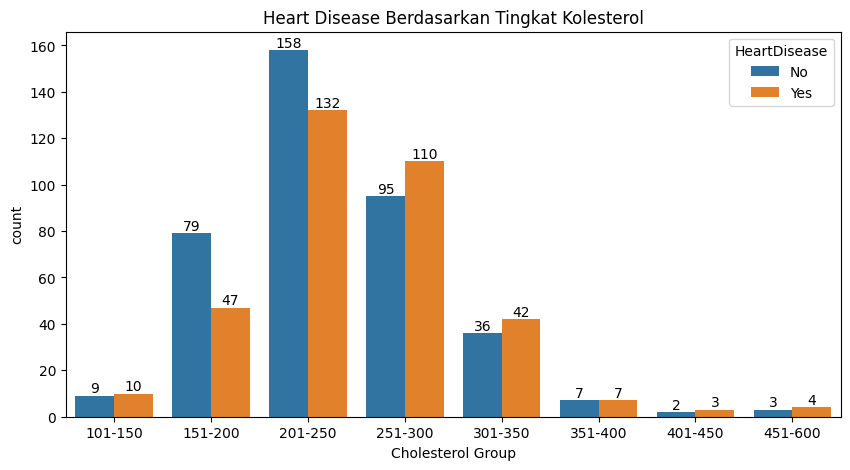

In [81]:
# Lakukan binning untuk kolesterol
bins = [100, 150, 200, 250, 300, 350, 400, 450, 600]
labels = ['101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '401-450', '451-600']
df['Cholesterol Group'] = pd.cut(df['Cholesterol'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='Cholesterol Group', hue='HeartDisease')

# Memberi anotasi
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Heart Disease Berdasarkan Tingkat Kolesterol')
plt.show()

Tampak bahwa orang dengan tingkat kolesterol di atas 251 mm/dL menderita penyakit jantung. Maka, lebih baik menjaga tingkat kolesterol antara 151-250 mm/dL agar terhindar dari penyakit jantung.

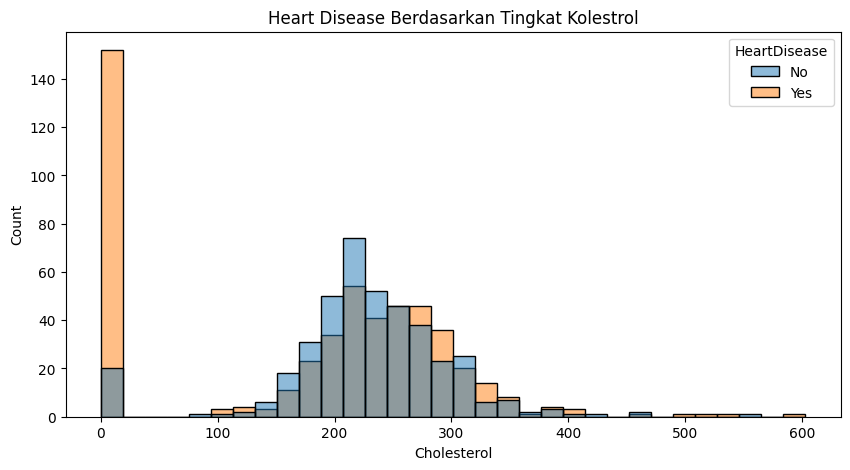

In [82]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df, x='Cholesterol', hue='HeartDisease')

plt.title('Heart Disease Berdasarkan Tingkat Kolestrol')
plt.show()

In [83]:
df['Cholesterol'].replace(0, df['Cholesterol'].median(),inplace=True)

#### Setelah handling outliers

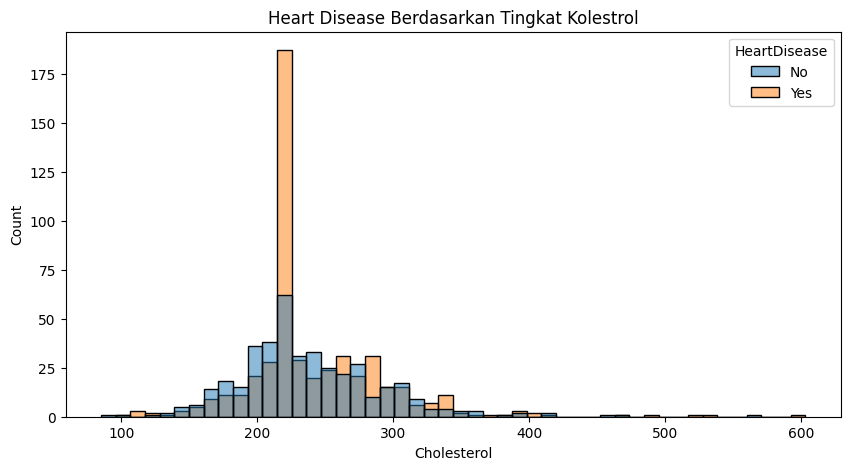

In [84]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df, x='Cholesterol', hue='HeartDisease')

plt.title('Heart Disease Berdasarkan Tingkat Kolestrol')
plt.show()

## **8. Apakah kadar gula darah mempengaruhi munculnya penyakit jantung?**

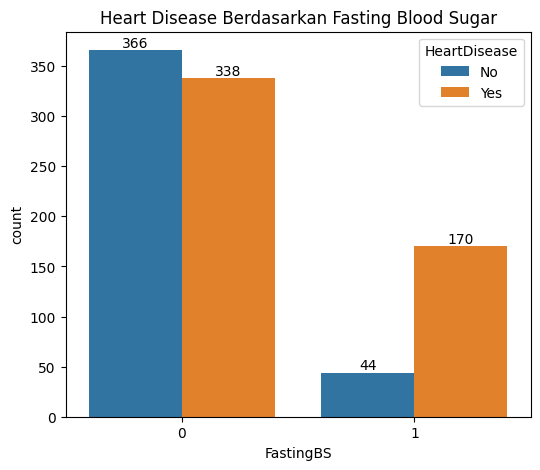

In [86]:
plt.figure(figsize=(6, 5))
ax = sns.countplot(data=df, x='FastingBS', hue='HeartDisease')

#  Memberi anotasi
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Heart Disease Berdasarkan Fasting Blood Sugar')
plt.show()

Ya. Tampak bahwa sebagian besar orang yang memiliki kadar gula darah di atas 120 mg/dL memiliki penyakit jantung.
<br>Hal tersebut masuk akal karena tingginya kadar gula darah dapat merusak pembuluh darah dan menyebabkan komplikasi penyakit jantung serius.

## **9. Bagaimana relasi resting electrocardiogram terhadap penyakit jantung?**

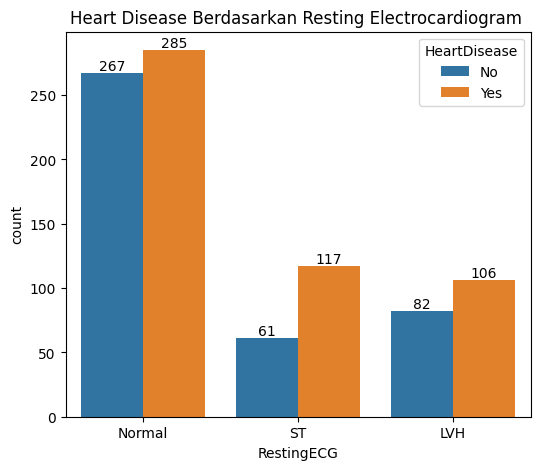

In [87]:
plt.figure(figsize=(6, 5))
ax = sns.countplot(data=df, x='RestingECG', hue='HeartDisease')

#  Memberi anotasi
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Heart Disease Berdasarkan Resting Electrocardiogram ')
plt.show()

Tampak bahwa tidak ada perbedaan yang signifikan antara ketiga hasil dari resting electrocardiogram terhadap penyakit jantung.

## **10. Bagaimana pengaruh tingkat depresi segmen ST terhadap penyakit jantung?**

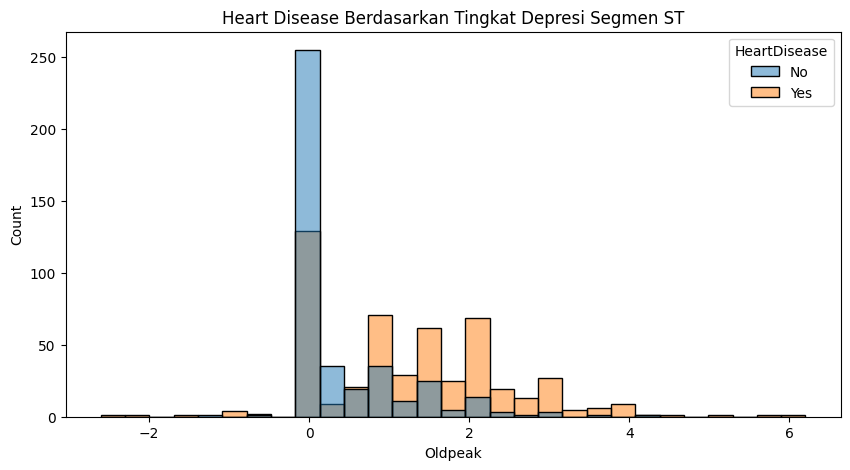

In [85]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df, x='Oldpeak', hue='HeartDisease')

plt.title('Heart Disease Berdasarkan Tingkat Depresi Segmen ST')
plt.show()

Tampak bahwa orang yang memiliki hasil tes depresi segmen ST di atas 1 menderita penyakit jantung.
<br>Dengan kata lain, semakin besar tingkat depresi segmen ST, maka semakin besar pula kemungkinan menderita penyakit jantung.

## **11. Apakah angina akibat olahraga dapat mengindikasikan seseorang menderita penyakit jantung?**

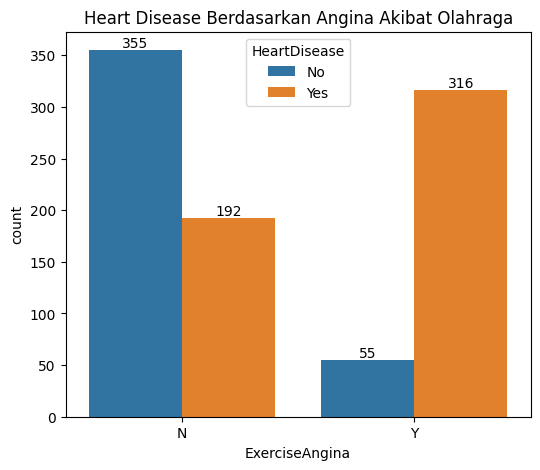

In [88]:
plt.figure(figsize=(6, 5))
ax = sns.countplot(data=df, x='ExerciseAngina', hue='HeartDisease')

#  Memberi anotasi
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Heart Disease Berdasarkan Angina Akibat Olahraga')
plt.show()

Ya, munculnya angina setelah berolahraga dapat menjadi indikator bahwa seseorang menderita penyakit jantung.
<br>Tampak perbedaan yang sangat signifikan pada grafik di atas bahwa sebagian besar orang yang mengalami angina setelah olahraga ternyata menderita penyakit jantung.

## **12. Apakah tingkat kemiringan segmen ST dapat mengindikasikan penyakit jantung?**

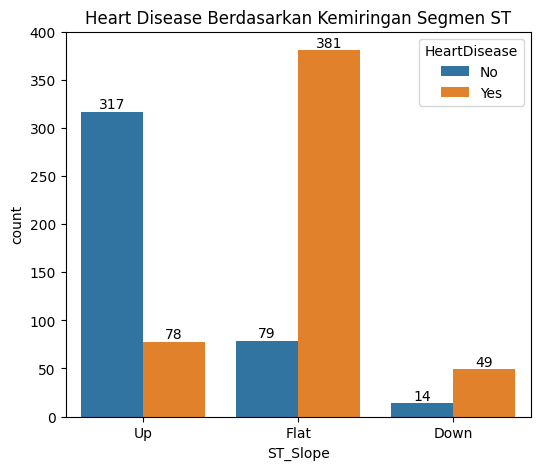

In [89]:
plt.figure(figsize=(6, 5))
ax = sns.countplot(data=df, x='ST_Slope', hue='HeartDisease')

#  Memberi anotasi
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Heart Disease Berdasarkan Kemiringan Segmen ST')
plt.show()

Ya, kemiringan segmen ST dapat menjadi indikasi apakah seseorang menderita penyakit jantung atau tidak.
<br>Tampak bahwa sebagian besar orang yang memiliki kemiringan segmen ST datar dan menurun ternyata menderita penyakit jantung.
<br>Jika hasil tes ST seseorang menunjukkan bahwa segmen ST-nya datar atau menurun, maka orang tersebut memiliki kemungkinan besar menderita penyakit jantung.

Bonus

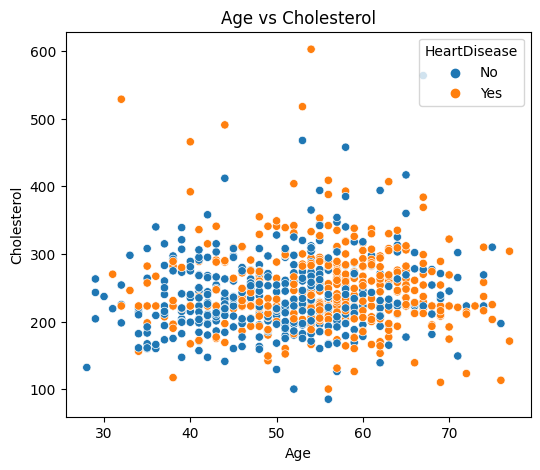

In [90]:
plt.figure(figsize=(6, 5))
ax = sns.scatterplot(data=df, x='Age', y='Cholesterol', hue='HeartDisease')


plt.title('Age vs Cholesterol')
plt.show()

Umur tidak berpengaruh terhadap tingkat kolesterol